In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crawford/emnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/emnist


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train_cat,validation_data=(X_test, y_test_cat),epochs=10,batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 67ms/step - accuracy: 0.7995 - loss: 0.6119 - val_accuracy: 0.9819 - val_loss: 0.0592
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9640 - loss: 0.1208 - val_accuracy: 0.9882 - val_loss: 0.0383
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.9729 - loss: 0.0896 - val_accuracy: 0.9895 - val_loss: 0.0312
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.9777 - loss: 0.0733 - val_accuracy: 0.9899 - val_loss: 0.0304
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9808 - loss: 0.0640 - val_accuracy: 0.9905 - val_loss: 0.0294
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.9826 - loss: 0.0572 - val_accuracy: 0.9918 - val_loss: 0.0246
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 67ms/step - accuracy: 0.9842 - loss: 0.0536 - val_accuracy: 0.9913 - val_loss: 0.0250
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.9850 - loss: 0.0463 - 

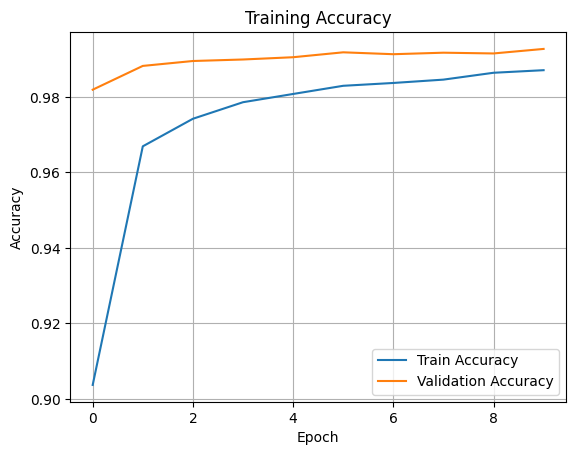

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Final Test: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9902 - loss: 0.0271
Final Test: 0.9927


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


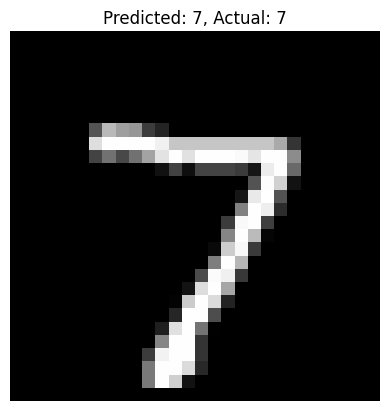

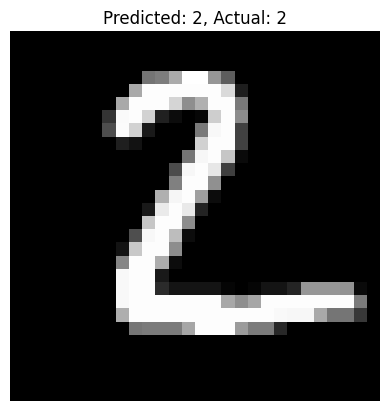

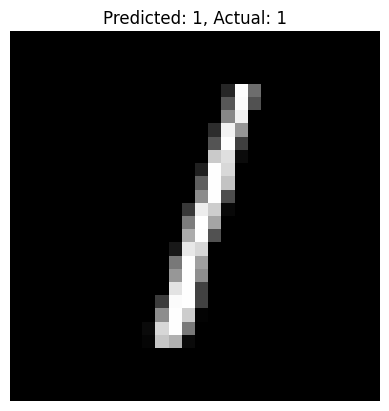

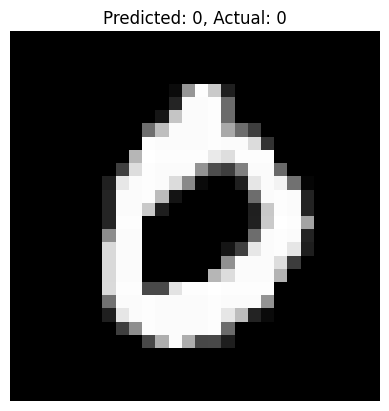

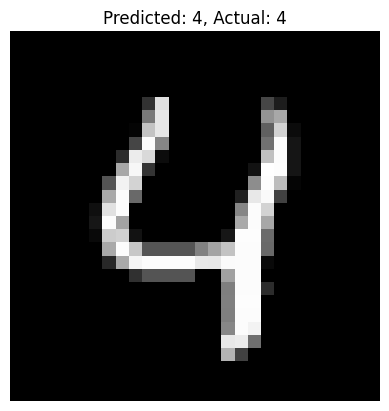

In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Plot first 5 predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
    plt.axis("off")
    plt.show()